In [7]:
import numpy as np
import pandas as pd

data = pd.read_csv('dataset13.csv')
# data.head()

In [8]:
print(data.shape)
print(data.isna().sum().sum())

(270, 10)
0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bpm           270 non-null    int64  
 1   pace          270 non-null    int64  
 2   time          270 non-null    int64  
 3   temperature   270 non-null    int64  
 4   gap           270 non-null    int64  
 5   dist_quater   270 non-null    int64  
 6   count_quater  270 non-null    int64  
 7   steps_quater  270 non-null    int64  
 8   puls_quater   270 non-null    int64  
 9   weight_year   270 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 21.2 KB


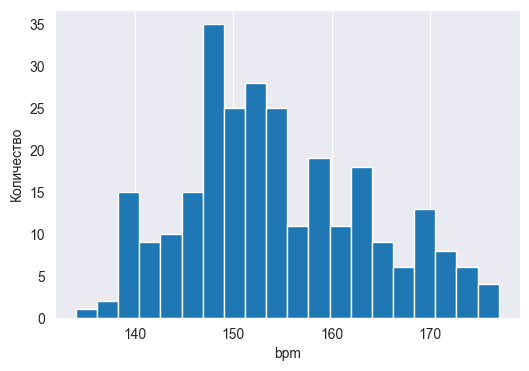

In [10]:
# Проверяем распределение целевой переменной
import matplotlib.pyplot as plt

data['bpm'].plot.hist(bins=20, figsize=(6, 4))
plt.grid(axis='y')
plt.xlabel("bpm")
plt.ylabel("Количество")
plt.show()

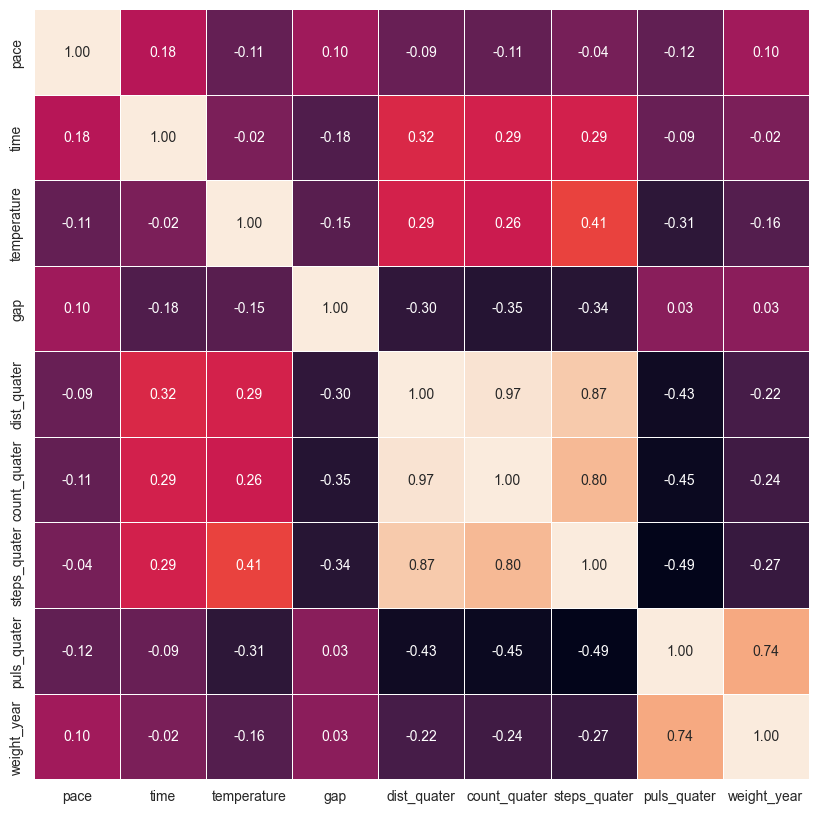

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(data.drop(['bpm'], axis=1).corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

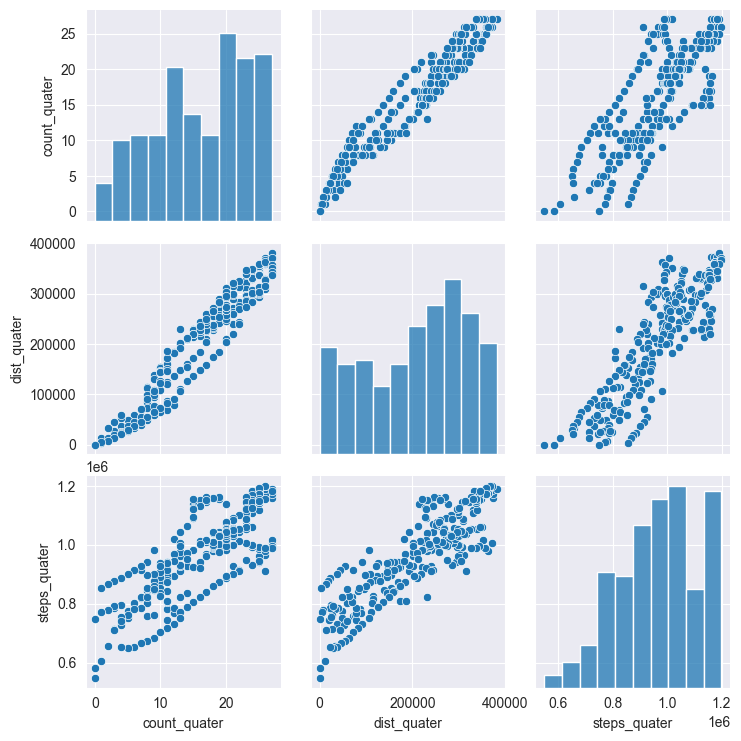

In [12]:
# Посмотрим более внимательно на коррелирующие поля
sns.pairplot(
    data,
    vars=['count_quater', 'dist_quater', 'steps_quater'],  # только эти переменные
)

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(
    data.drop('bpm', axis=1),
    data.bpm,
    test_size=0.15,
    random_state=42
)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test RMSE = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("Train RMSE = %.4f" % np.sqrt(mean_squared_error(y_train, y_train_pred)))

print('----------')
for i, coef in enumerate(model.coef_):
    print(f"Feature {i}: {coef:.4f}")

Test RMSE = 4.5232
Train RMSE = 4.3672
----------
Feature 0: -36.9961
Feature 1: 9.4928
Feature 2: 7.0142
Feature 3: 3.4618
Feature 4: -22.9207
Feature 5: 13.3581
Feature 6: -0.0095
Feature 7: 8.2748
Feature 8: 7.4857
